In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_csv('train.csv')
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
train_df.shape

(9557, 143)

In [3]:
train_df.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [4]:
test_df=pd.read_csv('test.csv')

In [6]:
test_df.shape

(23856, 142)

### Identify the output variable : Ans : Target variable 

In [5]:
train_df['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

### Understand the type of data. Ans: dataset has 130 interger, 8 float and 5 pbject columns 

In [6]:
train_df.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

### Check if there are any biases in your dataset.


In [7]:
train_df['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

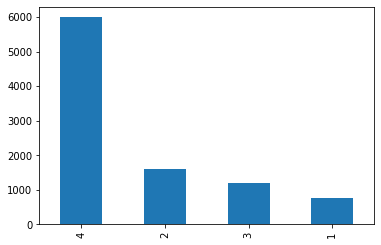

In [8]:
train_df['Target'].value_counts().plot.bar()

### Ans: Outoff  9557  more than 50 % of the data is of clas s 4 and class 1 datarecords are very minimum

# EDA

In [9]:
train_df.isnull().sum().sort_values(ascending=False)[:10]
#df1=pd.DataFrame()
#df1[df]

rez_esc           7928
v18q1             7342
v2a1              6860
meaneduc             5
SQBmeaned            5
techozinc            0
techoentrepiso       0
techocane            0
techootro            0
cielorazo            0
dtype: int64

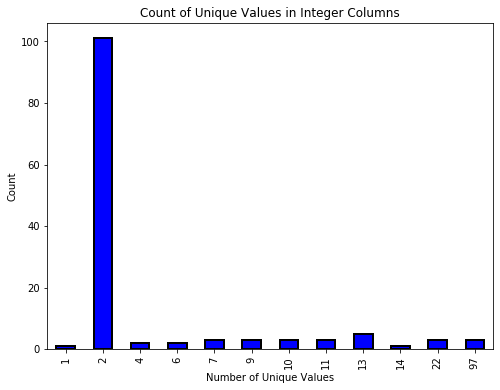

In [10]:
# Integer Columns
train_df.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values');
plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

### Combining test and train data 

In [11]:
# Add null Target column to test
test_df['Target'] = np.nan
train_len = len(train_df)
data =  pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True)

In [12]:
data.shape

(33413, 143)

In [13]:
data.select_dtypes('object')

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
33408,ID_a065a7cad,3aa78c56b,.5,5,no
33409,ID_1a7c6953b,d237404b6,yes,6,no
33410,ID_07dbb4be2,d237404b6,yes,6,no
33411,ID_34d2ed046,d237404b6,yes,6,no


In [14]:
data['dependency'].replace('no',0, inplace=True)
data['dependency'].replace('yes',1, inplace=True)
data['dependency']=data['dependency'].astype('float').inplace=True

In [15]:
data['edjefe'].replace('no',0, inplace=True)
data['edjefe'].replace('yes',1, inplace=True)
data['edjefa'].replace('no',0, inplace=True)
data['edjefa'].replace('yes',1, inplace=True)

In [16]:
data['edjefe']=data['edjefe'].astype('float').inplace=True

In [17]:
data['edjefa']=data['edjefa'].astype('float').inplace=True

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33413 entries, 0 to 33412
Columns: 143 entries, Id to Target
dtypes: bool(3), float64(9), int64(129), object(2)
memory usage: 35.8+ MB


In [19]:
data=data.drop(['Id','idhogar'],axis=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33413 entries, 0 to 33412
Columns: 141 entries, v2a1 to Target
dtypes: bool(3), float64(9), int64(129)
memory usage: 35.3 MB


### Check whether all members of the house have the same poverty level

In [21]:
# Groupby the household and figure out the number of unique values
all_equal = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


### Check if there is a house without a family head.

In [22]:
households_leader = train_df.groupby('idhogar')['parentesco1'].sum()
households_leader.head()
# Find households without a head
households_no_head = train_df.loc[train_df['idhogar'].isin(households_leader[households_leader == 0].index), :]
households_no_head
print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


### Set poverty level of the members and the head of the house within a family.

In [38]:
 #### not able understand this content please reply me with the expected solutions ######################

### Count how many null values are existing in columns.

In [23]:
missing=pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:10])
missing['percent'] = missing / len(data)
missing

,0,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
Target,23856,0.713974
meaneduc,36,0.001077
SQBmeaned,36,0.001077
abastaguafuera,0,0.000000
sanitario1,0,0.000000
coopele,0,0.000000
noelec,0,0.000000


### Remove null value rows of the target variable.

In [24]:
train_df['Target'].isna().sum()

0

In [25]:
f_data=data.drop(['rez_esc','v18q1','v2a1'],axis=1)

In [26]:
f_data[['meaneduc','SQBmeaned']].describe()

,meaneduc,SQBmeaned
count,33377.000000,33377.000000
mean,9.178666,101.104384
std,4.105725,90.467735
min,0.000000,0.000000
25%,6.000000,36.000000
50%,8.666667,75.111115
75%,11.500000,132.250000
max,37.000000,1369.000000


In [27]:
# Replace these values by their means
f_data.fillna(value={'meaneduc':9.17,'SQBmeaned':101.10},inplace=True)

In [28]:
pd.DataFrame(f_data.isnull().sum().sort_values(ascending=False)[:10])

,0
Target,23856
noelec,0
sanitario6,0
sanitario5,0
sanitario3,0
sanitario2,0
sanitario1,0
coopele,0
planpri,0
techoentrepiso,0


In [29]:
train_data = f_data.loc[f_data['Target'].notnull(), :].copy()
train_data.shape

(9557, 138)

In [30]:
train_data.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0
1,0,4,0,1,1,1,0,1,1,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0
2,0,8,0,1,1,0,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0
3,0,5,0,1,1,1,0,2,2,1,...,81,289,16,121,4,1.777778,1.0,121.0,289,4.0
4,0,5,0,1,1,1,0,2,2,1,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4.0


In [31]:
final_test = f_data.loc[f_data['Target'].isnull(), :].copy()
final_test.shape

(23856, 138)

### Predict the accuracy using random forest classifier.

In [32]:
from sklearn.model_selection import train_test_split
y=train_data['Target']
X=train_data.drop(['Target'],axis=1)

In [81]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150,random_state= 21)

In [35]:
from sklearn.metrics import accuracy_score

In [47]:
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

0.9065550906555091


In [37]:
## using kfold cross validation 
from sklearn import model_selection

In [48]:
kfold= model_selection.KFold(n_splits=10)
model=RandomForestClassifier(n_estimators=150,random_state= 21)
results=model_selection.cross_val_score(model,X,y,cv=kfold)
print(results.mean()) 

0.65624340073167


### Random forest Clssifier is giving 91.7 % accuracy, Now lets predict the targets for given test data

In [39]:
final_test.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
9557,0,5,0,1,1,0,1,1,2,0,...,0,16,9,0,1,2.25,0.25,272.25,16,NaN
9558,0,5,0,1,1,0,1,1,2,0,...,256,1681,9,0,1,2.25,0.25,272.25,1681,NaN
9559,0,5,0,1,1,0,1,1,2,0,...,289,1681,9,0,1,2.25,0.25,272.25,1681,NaN
9560,0,14,0,1,1,1,0,1,1,0,...,256,3481,1,256,0,1.00,0.00,256.00,3481,NaN
9561,0,4,0,1,1,1,0,0,0,0,...,121,324,1,0,1,0.25,64.00,101.10,324,NaN


In [40]:
final_test=final_test.drop(['Target'],axis=1)

In [41]:
classifier.fit(X,y)
Fianl_predict = classifier.predict(final_test)

In [42]:
Fianl_predict

array([4., 4., 4., ..., 4., 4., 2.])

In [44]:
train_predict=classifier.predict(X)
accuracy = accuracy_score(train_predict,y)
print(accuracy)

1.0


### Observation: As the training accurcay is 100% this model is a overfittig model